In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
# Replace 'your_file.csv' with your actual file path
df10 = pd.read_csv('PM10-sensors.csv')


df10.head
# Display initial info about NaN values
print("Initial NaN count per column:")
print(df10.isnull().sum())

# Option 1: Remove rows with any NaN values
df10_clean = df10.dropna()

# Option 2: Fill NaN values with mean of the column
#df10_clean = df10.fillna(df10_clean.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
df10_clean = df10.fillna(0)

print("\nShape before cleaning:", df10.shape)
print("Shape after cleaning:", df10_clean.shape)



Initial NaN count per column:
Time          0
Sensor1     231
Sensor2    2313
Sensor3    1703
dtype: int64

Shape before cleaning: (10005, 4)
Shape after cleaning: (10005, 4)


In [5]:
df25 = pd.read_csv('PM2.5-sensors.csv')


df25.head
# Display initial info about NaN values
print("Initial NaN count per column:")
print(df25.isnull().sum())

# Option 1: Remove rows with any NaN values
#df_clean = df10.dropna()

# Option 2: Fill NaN values with mean of the column
#df25_clean = df25.fillna(df25.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
df25_clean = df25.fillna(0)

print("\nShape before cleaning:", df25.shape)
print("Shape after cleaning:", df25_clean.shape)

Initial NaN count per column:
Time          0
Sensor1     231
Sensor2    2313
Sensor3    1703
dtype: int64

Shape before cleaning: (10005, 4)
Shape after cleaning: (10005, 4)


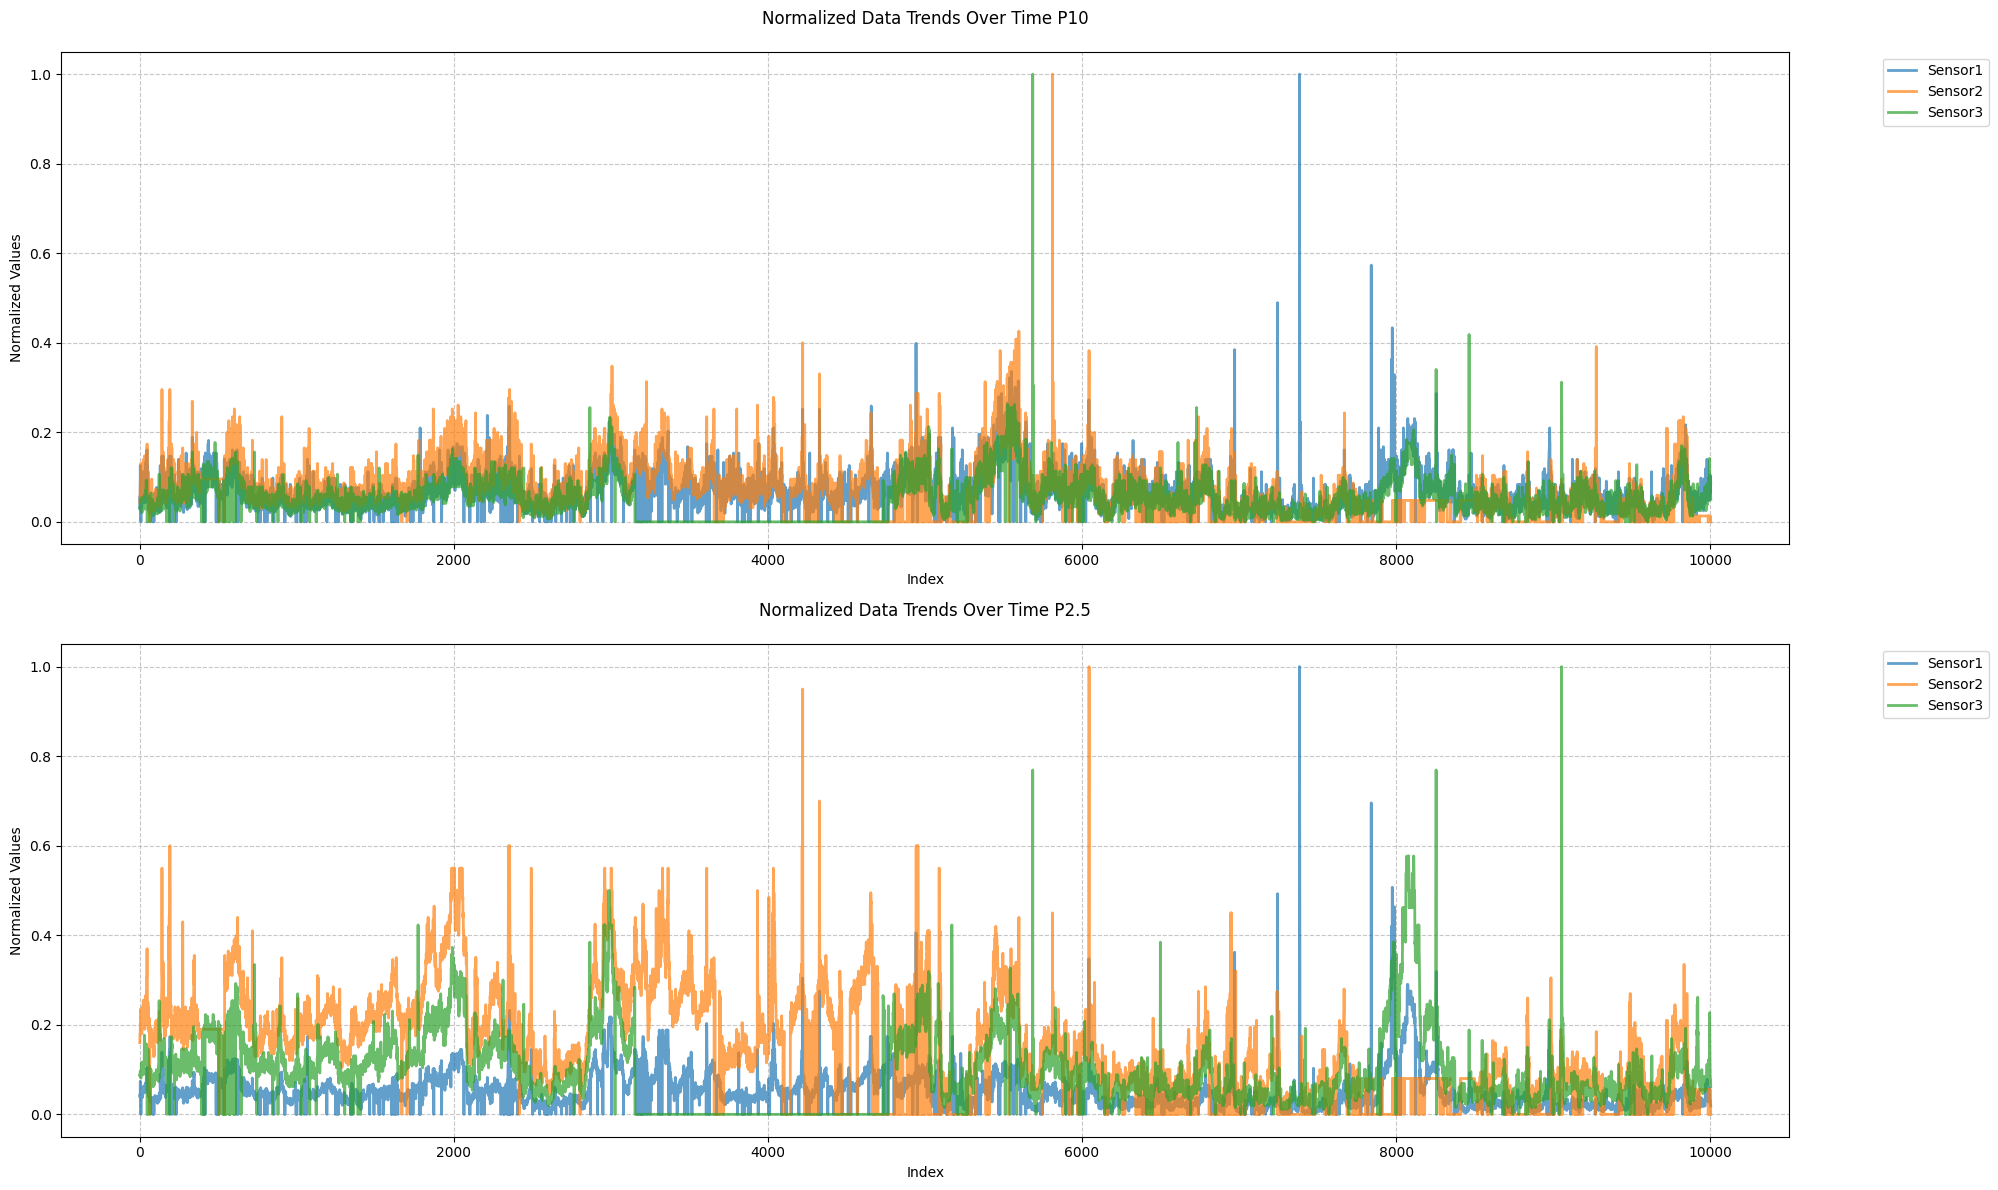

In [7]:
# Create a figure with subplots: line plots and correlation heatmap
fig = plt.figure(figsize=(20, 12))

# Define grid layout
gs = fig.add_gridspec(2, 2)

# 1. Line plots of all numeric columns
ax1 = fig.add_subplot(gs[0, :])  # Top row, full width

# Get numeric columns
numeric_cols = df10_clean.select_dtypes(include=[np.number]).columns

# Plot each numeric column
for column in numeric_cols:
    # Normalize data to make trends comparable
    normalized_data = (df10_clean[column] - df10_clean[column].min()) / \
                     (df10_clean[column].max() - df10_clean[column].min())
    ax1.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)

ax1.set_title('Normalized Data Trends Over Time P10', pad=20)
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. plot 25
ax2 = fig.add_subplot(gs[1, :])  # Bottom row, full width


# Get numeric columns
numeric_cols = df25_clean.select_dtypes(include=[np.number]).columns

# Plot each numeric column
for column in numeric_cols:
    # Normalize data to make trends comparable
    normalized_data = (df25_clean[column] - df25_clean[column].min()) / \
                     (df25_clean[column].max() - df25_clean[column].min())
    ax2.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)

ax2.set_title('Normalized Data Trends Over Time P2.5', pad=20)
ax2.set_xlabel('Index')
ax2.set_ylabel('Normalized Values')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, linestyle='--', alpha=0.7)

#


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Optional: Save the plot
# plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')

# Display statistical summary
print("\nStatistical Summary P10:")
print(df10_clean.describe())

print("\nStatistical Summary P2.5:")
print(df25_clean.describe())

In [ ]:
# Display significant correlations (absolute value > 0.5)
print("\nSignificant correlations (absolute value > 0.5):")
significant_corr = pd.DataFrame()
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if abs(correlation_matrix.loc[index, column]) > 0.5 and index != column:
            significant_corr = pd.concat([significant_corr, 
                pd.DataFrame({'Variable 1': [index], 
                            'Variable 2': [column],
                            'Correlation': [correlation_matrix.loc[index, column]]})
            ])

if not significant_corr.empty:
    print(significant_corr.sort_values('Correlation', ascending=False))

# Optional: Add subplot with individual line plots
def plot_individual_trends(data, columns, rows=2, cols=2):
    """
    Create individual line plots for specified columns
    """
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, column in enumerate(columns[:rows*cols]):
        axes[idx].plot(data.index, data[column], linewidth=2)
        axes[idx].set_title(f'{column} Over Time')
        axes[idx].set_xlabel('Index')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

In [ ]:


# Show the plot
plt.show()